# Constant stress flange cross section

<img src="constant_stress_flange.png" style="width:50%;">

In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as ipydisp
def symdisp(*args): ipydisp.display(ipydisp.Latex(r"$\displaystyle{" + r",\ ".join([smp.latex(x) for x in args]) + r"}$"))

Define $h(r) = \sqrt{\cfrac{3 \, F_8 \, (r_2 - r)}{\pi \, \sigma \, r}}$

In [2]:
r, r2, F, sigma = smp.symbols(r"r r_2 F \sigma", real=True, positive=True)
h = smp.symbols(r"h", cls=smp.Function, real=True, positive=True)
h = h(r)
symdisp(r, r2, F, sigma, h)

<IPython.core.display.Latex object>

In [3]:
h = smp.sqrt((3 * F * (r2 - r)) / (smp.pi * sigma * r))
h_f = smp.lambdify((r, r2, F, sigma), h, "numpy")
symdisp(h)

<IPython.core.display.Latex object>

Define values for numerical calculations 

In [4]:
r1_val = 100  # mm
r2_val = 150  # mm
F_val = 80000  # N
sigma_val = 80  # N/mm2, MPa 
r_vals = np.linspace(r1_val, r2_val, 1000)
h_vals = h_f(r_vals, r2_val, F_val, sigma_val)

Plot flange cross section curve $h(r)$ where $r \in \langle r_1, r_2 \rangle$

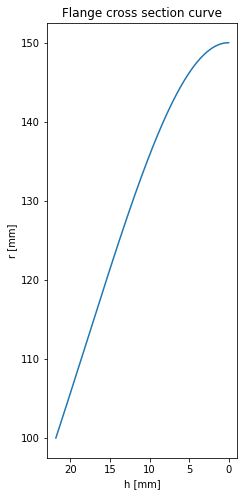

In [5]:
plt.figure(figsize=(8,8))
plt.plot(h_vals, r_vals)
plt.title("Flange cross section curve")
plt.xlabel("h [mm]")
plt.ylabel("r [mm]")
plt.gca().invert_xaxis()
plt.gca().set_aspect("equal", adjustable="box")

Find inflection point on the curve

In [6]:
h_d = smp.diff(h, r).simplify()
h_dd = smp.diff(h_d, r).simplify()
symdisp(h_d, h_dd)

<IPython.core.display.Latex object>

In [7]:
r_crit = smp.solve(h_dd, r)[0]
r_crit_f = smp.lambdify((r2, F, sigma), r_crit, "numpy")
symdisp(r_crit)

<IPython.core.display.Latex object>

In [8]:
r_crit_val = r_crit_f(r2_val, F_val, sigma_val)
symdisp(r_crit_val)

<IPython.core.display.Latex object>

Fit line to the curve at the inflection point

In [9]:
h_d_f = smp.lambdify((r, r2, F, sigma), h_d, "numpy")
h_d_crit_val = h_d_f(r_crit_val, r2_val, F_val, sigma_val)
symdisp(h_d_crit_val)

<IPython.core.display.Latex object>

In [10]:
h_crit_val = h_f(r_crit_val, r2_val, F_val, sigma_val)
h_tangent_f = np.vectorize(lambda r: h_crit_val + h_d_crit_val * (r - r_crit_val))
h_tangent_vals = h_tangent_f(r_vals)

Plot flange cross section curve $h(r)$ and its tangent line $h_{\tau}(r)$ where $r \in \langle r_1, r_2 \rangle$

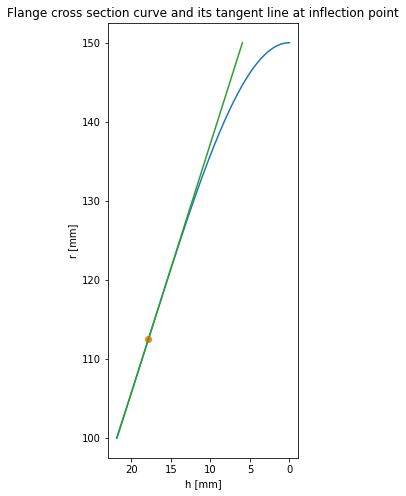

In [11]:
plt.figure(figsize=(8,8))
plt.plot(h_vals, r_vals)
plt.plot(h_crit_val, r_crit_val, marker="o")
plt.plot(h_tangent_vals, r_vals)
plt.title("Flange cross section curve and its tangent line at inflection point")
plt.xlabel("h [mm]")
plt.ylabel("r [mm]")
plt.gca().invert_xaxis()
plt.gca().set_aspect("equal", adjustable="box")

Calculate and plot vertices of flange cross section trapezoid

In [12]:
vertices = [[0, r2_val], [h_tangent_f(r2_val), r2_val], [h_tangent_f(r1_val), r1_val], [0, r1_val]]
vertices.append(vertices[0])
vertices = np.round(vertices, 3)
pd.DataFrame(vertices, columns=["h(r) [mm]", "r [mm]"])

,h(r) [mm],r [mm]
0,0.000,150.0
1,5.947,150.0
2,21.806,100.0
3,0.000,100.0
4,0.000,150.0


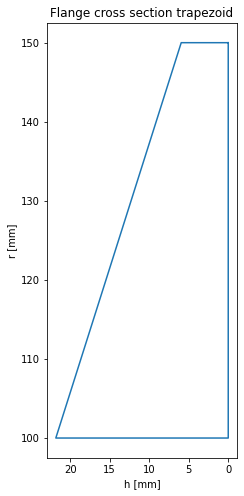

In [13]:
plt.figure(figsize=(8,8))
plt.plot([v[0] for v in vertices], [v[1] for v in vertices])
plt.title("Flange cross section trapezoid")
plt.xlabel("h [mm]")
plt.ylabel("r [mm]")
plt.gca().invert_xaxis()
plt.gca().set_aspect("equal", adjustable="box")

Calculate and plot stress in trapezoidal cross section

$\sigma_{o,trap} = \cfrac{M_o}{W_o} = \cfrac{F (r_2 - r)}{\frac{b \, h^2(r)}{6}} = \cfrac{6 \, F (r_2 - r)}{b \, h^2(r)} {\ \ } [\mathrm{\frac{N}{mm^2} = MPa}]$ 

$\Phi_{o,trap} = \cfrac{6 \, F (r_2 - r)}{h^2(r)} {\ \ } [\mathrm{\frac{N}{mm} = MPa \cdot mm}]$

In [14]:
phi_f = np.vectorize(lambda r, h: (6 * F_val * (r2_val - r)) / (h**2))
h_vals[h_vals == 0] = 1e-6  # fix divide by zero
phi_vals = phi_f(r_vals, h_vals)
phi_trap_vals = phi_f(r_vals, h_tangent_vals)

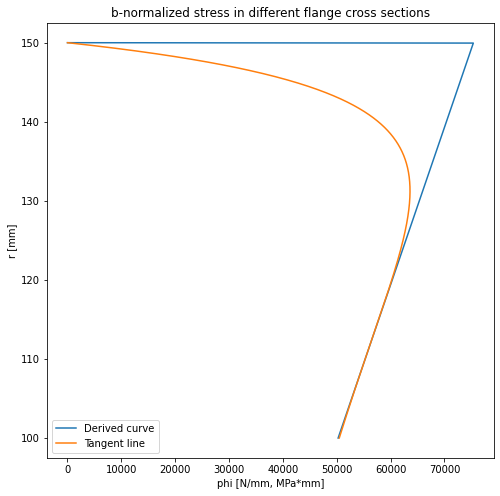

In [15]:
plt.figure(figsize=(8,8))
plt.plot(phi_vals, r_vals)
plt.plot(phi_trap_vals, r_vals)
plt.legend(["Derived curve", "Tangent line"])
plt.title("b-normalized stress in different flange cross sections")
plt.xlabel("phi [N/mm, MPa*mm]")
_ = plt.ylabel("r [mm]")

In [16]:
sigma_trap_vals = sigma_val * (h_vals / h_tangent_vals)**2

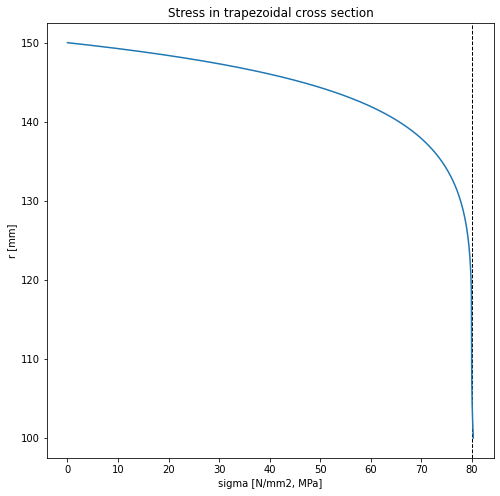

In [17]:
plt.figure(figsize=(8,8))
plt.axvline(sigma_val, color="black", linestyle="--", linewidth=1)
plt.plot(sigma_trap_vals, r_vals)
plt.title("Stress in trapezoidal cross section")
plt.xlabel("sigma [N/mm2, MPa]")
_ = plt.ylabel("r [mm]")